# Graph Neural Networks 

This handles graph structures with neural nets. 



## Motivation

We've handled images and text. We use CNN or RNN

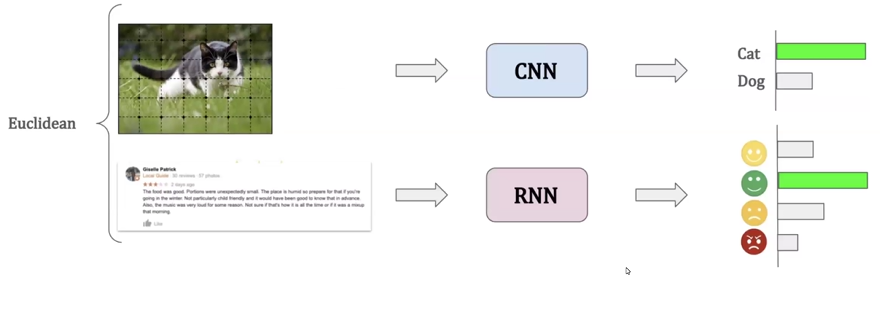

## Non-euclidean data 

We cannot represent these using Euclidean Geometry. 

For example, some kind of molecule. 

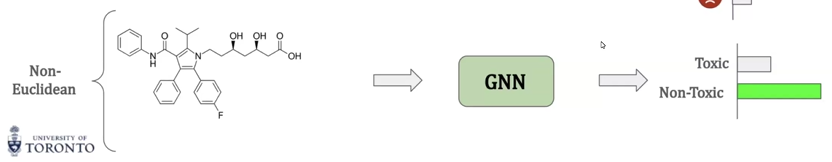

## Graphs 

A graph **G=(V, E, X)** is a data-structure that encodes 

**pairwise interactions** or **relations** among **concepts** and **objects**. 
- V is set of nodes representating concepts or objects 
- E is a **set of edges** connecting nodes and representing relations or interactions among them 
- X encodes the node features of each node. 

(You can also have edge features)

## Adjacency Matrix A
Instead of picture of a graph

We can represent the edges in this matix 

- **Degree:** Number of edges connection to that node 

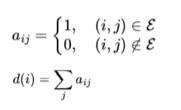

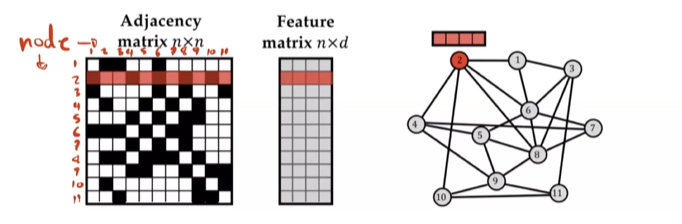

Black means CONNECTION 

White means NO CONNECTION

## Feature Matrix 
So if each node has 4 features, just stuff it into the corresponding row. 

## Degree Vector 
$d$ will have a dimension of 11

$d(i) = \sum_j a_{ij}$

## Graphs are order-invariant!
The numbering is irrelevant! 

For n nodes, there are n! combinations of the same graph. 

We want the model to understand this.

## Transformers & Graphs 

What happens if we omit the Positional Encoding from Transformers? 

We'll just get a graph structure! 

The transformer learns an **NxN attention matrix** which represent pairwise importance scores. 

This means Transformer creates a fully-connected graph over the input and learns the **edge weights**!

## Message-Passing 
The graph structure itself doesn't change. 

The numbers are the same, the structure is the same, but the features would be different!



Before, we would have 

A, d, and x 

After the GNN, we would have A, d, z

z just has **more dimensions** than x. 

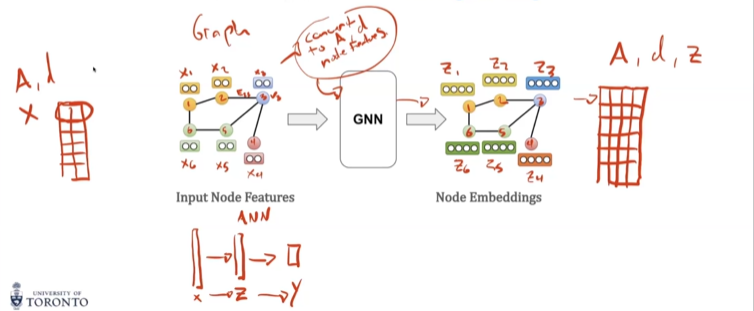

1. **Aggregate** embeddings of its neighbor nodes 
2. **Combine** the aggregated embedding with the node embedding 
3. **Update** the node embedding. 

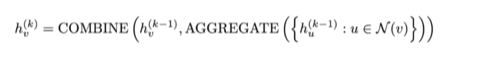

For node v, 

AGGREGATE ndoe 2, 4, 5

Note that this operation **Must be order invariant**

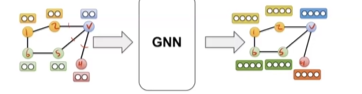

Now we combine the aggregate with the node itself!

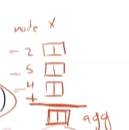

### Option 1: Just add, then NN 
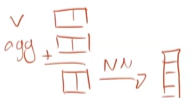

### Option 2: Concatenation 
(Directly stack the features)

### Option 3: Using a combination of both. 

## Read-out Operator 

Essentially like a pooling operator 

Converts node embeddings to graph embeddings

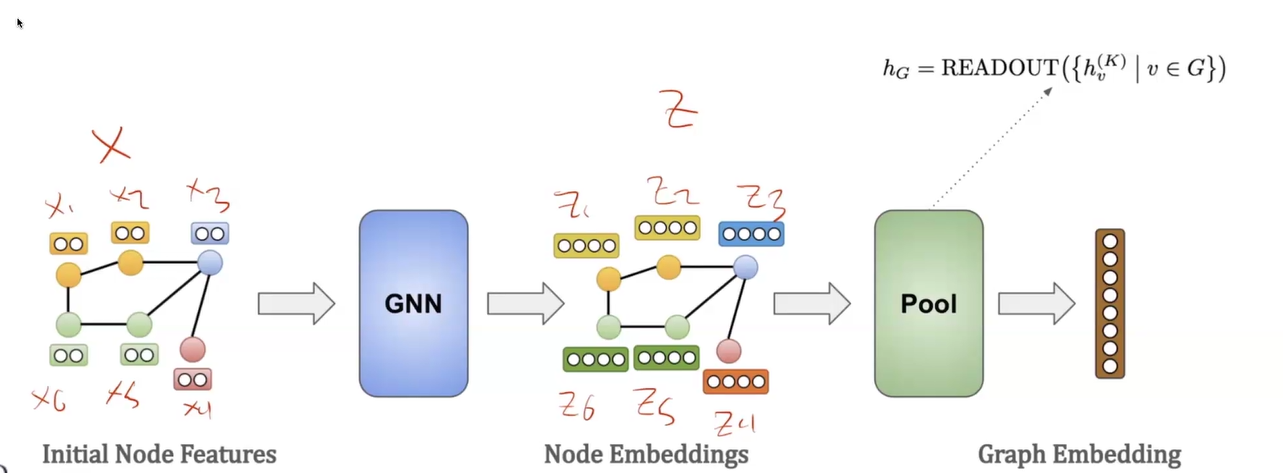

Again **must be order invariant**

## GNN capabilities 

1. Using them to predict node classes 
- Maybe predicting the type of atom

2. Predicting Graph classes 

3. Predicting links between nodes!

Pass edge embeddings and predict what kind of (bond?) or maybe strength of the link

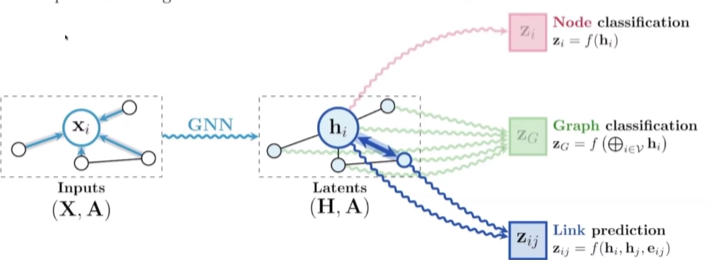

## Graph Convolutional Networks (GCNs)

On paper we can just do message-passing many times. 

We are just increasing the receptive field. 

## GNN Layer 

A layer of a GNN is a **nonlinear function** over node features and adjacency matrix. 

$$
\textbf{H = ReLU(AXW + b)}
$$

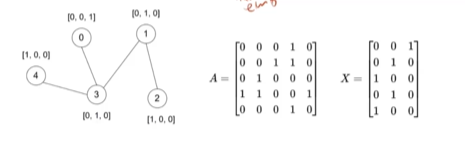

A = Adjacency Matrix 

X = Feature Embeddings 

W = Weights 

This is a strong model but with **two limitations**. 

## Limitation 1
Multiplication with A means that for every node, we **sum up** all the feature vectors of all neighbouring nodes but NOT the node itself. 

### Fix: 
Add identify matrix; these are self loops. This just adds "1s" to the diagonal. 

## Limitation 2
This adjacency matrix is NOT normalized. Multiplcation with A will completley change the scale of feature vectors. 

### Fix: 
Symmetrically normalize A using diagonal degree matrix D such that all rows sum to one. 

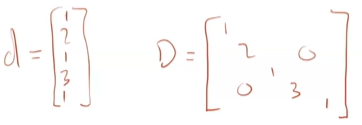

## Final fix of GCN Layer: 

$$
H = ReLU (D^{-1/2} A D^{-1/2} X W + b)
$$

Where A = A + I 

## Going deeper? 

A GCN layer udpates the node embeddings based on the features of the immediate neighbours! 

We can influence the embeddings from further neighborhood by stacking GCN layers. 

$H^{(1)}$ looks at the neighbors of node V (1 hop)

$H^{(2)}$ : Node embeddings in layer 2 are computer based on contributions from 1-hop and 2-hop neighbors. 

For example if you want to model mutual friends, or mutual interests, this is how you would do it. 

## Graph Attention Networks (GAT)

Instead of using **node degree**, learn an attention score between two nodes. I.e. learn the contribution weight of neighbor nodes. 

1. Shared NN to compute an attension score between two nodes 

2. Normalize attention scores through softmax 

3. Update the node embeddings based on the attention score. 

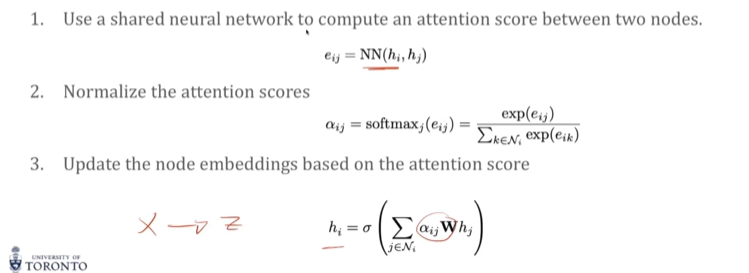